В качестве набора данных мы будем использовать набор данных “Nutrition Facts for McDonald's Menu”, содержащий информацию о питательности блюд и напитков из меню McDonald's - https://www.kaggle.com/datasets/mcdonalds/nutrition-facts

Эта информация может быть полезна для исследования проблемы качества питания клиентов, могут быть получены выводы, которые могут быть использованы для внесения изменений в меню или для планирования рекламных ходов, что приведет к закреплению статуса сети питания.

Датасет состоит из одного файла - menu.csv, содержащего информацию о порциях блюд и напитков и содержании в них питательных веществ.

Файл содержит следующие колонки:
1)	Category – категория блюда или напитка,
2)	Item – наименование блюда или напитка,
3)	Serving Size – размер порции,
4)	Calories – количество калорий,
5)	Calories from Fat – калории с жиров,
6)	Total Fat – количество жиров,
7)	Total Fat (% Daily Value) – процент жиров от дневной нормы жиров,
8)	Saturated Fat – количество насыщенных жиров,
9)	Saturated Fat (% Daily Value) – процент насыщенных жиров от дневной нормы насыщенных жиров,
10)	Trans Fat–количество трансжиров,
11)	Cholesterol – количество холестерина,
12)	Cholesterol (% Daily Value) – процент холестерина от дневной нормы холестерина,
13)	Sodium – количество натрия,
14)	Sodium (% Daily Value) – процент натрия от дневной нормы натрия,
15)	Carbohydrates – количество углеводов,
16)	Carbohydrates (% Daily Value) – процент углеводов от дневной нормы углеводов,
17)	Dietary Fiber – количество пищевых волокон,
18)	Dietary Fiber (% Daily Value) – процент пищевых волокон от дневной нормы пищевых волокон,
19)	Sugars – количество сахаров,
20)	Protein – количество протеина,
21)	Vitamin A (% Daily Value) – процент витамина A от дневной нормы витамина A,
22)	Vitamin C (% Daily Value) – процент витамина C от дневной нормы витамина C,
23)	Calcium (% Daily Value) – процент кальция от дневной нормы кальция,
24)	Iron (% Daily Value) – процент железа от дневной нормы железа.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
from pandas.plotting import parallel_coordinates
import math
import seaborn as sns
import scipy
import plotly

In [2]:
dataset = pd.read_csv('menu.csv')

In [3]:
# Первые 5 строк датасета
dataset.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
# Размер датасета - 260 строк, 24 колонки
dataset.shape

(260, 24)

In [5]:
total_count = dataset.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 260


In [6]:
# Список колонок
dataset.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [7]:
# Список колонок с типами данных
dataset.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

In [8]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in dataset.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = dataset[dataset[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Category - 0
Item - 0
Serving Size - 0
Calories - 0
Calories from Fat - 0
Total Fat - 0
Total Fat (% Daily Value) - 0
Saturated Fat - 0
Saturated Fat (% Daily Value) - 0
Trans Fat - 0
Cholesterol - 0
Cholesterol (% Daily Value) - 0
Sodium - 0
Sodium (% Daily Value) - 0
Carbohydrates - 0
Carbohydrates (% Daily Value) - 0
Dietary Fiber - 0
Dietary Fiber (% Daily Value) - 0
Sugars - 0
Protein - 0
Vitamin A (% Daily Value) - 0
Vitamin C (% Daily Value) - 0
Calcium (% Daily Value) - 0
Iron (% Daily Value) - 0


In [9]:
# Основные статистические характеристки набора данных
dataset.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [10]:
dataset.drop(['Total Fat (% Daily Value)','Saturated Fat','Saturated Fat (% Daily Value)',
              'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 
              'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)',
             'Calcium (% Daily Value)'], axis=1, inplace=True)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Category                   260 non-null    object 
 1   Item                       260 non-null    object 
 2   Serving Size               260 non-null    object 
 3   Calories                   260 non-null    int64  
 4   Calories from Fat          260 non-null    int64  
 5   Total Fat                  260 non-null    float64
 6   Trans Fat                  260 non-null    float64
 7   Cholesterol                260 non-null    int64  
 8   Carbohydrates              260 non-null    int64  
 9   Sugars                     260 non-null    int64  
 10  Protein                    260 non-null    int64  
 11  Vitamin A (% Daily Value)  260 non-null    int64  
 12  Vitamin C (% Daily Value)  260 non-null    int64  
 13  Iron (% Daily Value)       260 non-null    int64  

In [12]:
dataset.duplicated().sum()

0

In [13]:
copied_ds = dataset.copy()

for col in dataset.select_dtypes(include=['object']).columns:
    copied_ds[col] = copied_ds[col].astype('string')
for col in dataset.select_dtypes(include=['float64']).columns:
    copied_ds[col] = copied_ds[col].astype('float16')
for col in dataset.select_dtypes(include=['int64']).columns:
    copied_ds[col] = copied_ds[col].astype('int16')

dataset = copied_ds

In [14]:
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Category                   260 non-null    string 
 1   Item                       260 non-null    string 
 2   Serving Size               260 non-null    string 
 3   Calories                   260 non-null    int16  
 4   Calories from Fat          260 non-null    int16  
 5   Total Fat                  260 non-null    float16
 6   Trans Fat                  260 non-null    float16
 7   Cholesterol                260 non-null    int16  
 8   Carbohydrates              260 non-null    int16  
 9   Sugars                     260 non-null    int16  
 10  Protein                    260 non-null    int16  
 11  Vitamin A (% Daily Value)  260 non-null    int16  
 12  Vitamin C (% Daily Value)  260 non-null    int16  
 13  Iron (% Daily Value)       260 non-null    int16  

In [15]:
vitA=pd.DataFrame(dataset.groupby('Category')['Vitamin A (% Daily Value)'].mean())
vitC=pd.DataFrame(dataset.groupby('Category')['Vitamin C (% Daily Value)'].mean())

In [16]:
vitA


,Vitamin A (% Daily Value)
Category,
Beef & Pork,6.933333
Beverages,0.740741
Breakfast,6.928571
Chicken & Fish,20.444444
Coffee & Tea,10.736842
Desserts,5.142857
Salads,146.666667
Smoothies & Shakes,18.750000
Snacks & Sides,4.846154


In [17]:
vitC

,Vitamin C (% Daily Value)
Category,
Beef & Pork,7.333333
Beverages,23.481481
Breakfast,8.904762
Chicken & Fish,12.629630
Coffee & Tea,0.000000
Desserts,4.142857
Salads,28.333333
Smoothies & Shakes,6.964286
Snacks & Sides,28.153846


In [18]:
vits=vitA.merge(vitC, left_on='Category', right_on='Category',
          suffixes=('_left', '_right'))

In [19]:
vits

,Vitamin A (% Daily Value),Vitamin C (% Daily Value)
Category,,
Beef & Pork,6.933333,7.333333
Beverages,0.740741,23.481481
Breakfast,6.928571,8.904762
Chicken & Fish,20.444444,12.629630
Coffee & Tea,10.736842,0.000000
Desserts,5.142857,4.142857
Salads,146.666667,28.333333
Smoothies & Shakes,18.750000,6.964286
Snacks & Sides,4.846154,28.153846


In [20]:
d = {'Category': ['Beef & Pork', 'Beverages', 'Breakfast', 'Chicken & Fish', 'Coffee & Tea', 'Desserts', 'Salads',
                  'Smoothies & Shakes', 'Snacks & Sides'], 'Category': ['Beef & Pork', 'Beverages', 'Breakfast',
                                                                        'Chicken & Fish', 'Coffee & Tea', 'Desserts', 'Salads',
                  'Smoothies & Shakes', 'Snacks & Sides']}
df = pd.DataFrame(data=d)
df

,Category
0,Beef & Pork
1,Beverages
2,Breakfast
3,Chicken & Fish
4,Coffee & Tea
5,Desserts
6,Salads
7,Smoothies & Shakes
8,Snacks & Sides


In [21]:
vits = vits.merge(df, left_on='Category', right_on='Category',
          suffixes=('_left', '_right'))

In [22]:
vits

,Category,Vitamin A (% Daily Value),Vitamin C (% Daily Value)
0,Beef & Pork,6.933333,7.333333
1,Beverages,0.740741,23.481481
2,Breakfast,6.928571,8.904762
3,Chicken & Fish,20.444444,12.629630
4,Coffee & Tea,10.736842,0.000000
5,Desserts,5.142857,4.142857
6,Salads,146.666667,28.333333
7,Smoothies & Shakes,18.750000,6.964286
8,Snacks & Sides,4.846154,28.153846


In [23]:
sug=pd.DataFrame(dataset.groupby('Category')['Sugars'].mean())
carb=pd.DataFrame(dataset.groupby('Category')['Carbohydrates'].mean())

In [24]:
merged=carb.merge(sug, left_on='Category', right_on='Category',
          suffixes=('_left', '_right'))

In [25]:
d = {'Category': ['Beef & Pork', 'Beverages', 'Breakfast', 'Chicken & Fish', 'Coffee & Tea', 'Desserts', 'Salads',
                  'Smoothies & Shakes', 'Snacks & Sides'], 'Category': ['Beef & Pork', 'Beverages', 'Breakfast',
                                                                        'Chicken & Fish', 'Coffee & Tea', 'Desserts', 'Salads',
                  'Smoothies & Shakes', 'Snacks & Sides']}
df = pd.DataFrame(data=d)

In [26]:
merged= merged.merge(df, left_on='Category', right_on='Category',
          suffixes=('_left', '_right'))
merged

,Category,Carbohydrates,Sugars
0,Beef & Pork,40.133333,8.800000
1,Beverages,28.814815,27.851852
2,Breakfast,49.761905,8.261905
3,Chicken & Fish,49.074074,7.333333
4,Coffee & Tea,44.526316,39.610526
5,Desserts,34.857143,26.142857
6,Salads,21.666667,6.833333
7,Smoothies & Shakes,90.428571,77.892857
8,Snacks & Sides,29.153846,4.076923


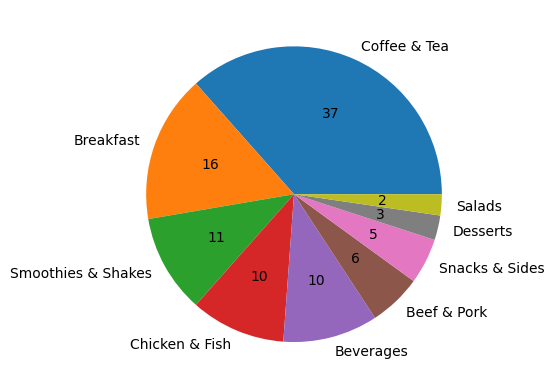

In [27]:
types = dataset['Category'].value_counts()
types = pd.DataFrame({'Category':types.index, 'Count':types.values})
plt.pie(types['Count'], labels=types['Category'], autopct = lambda p: format(p,'.0f') if p > 1 else None)
plt.show()

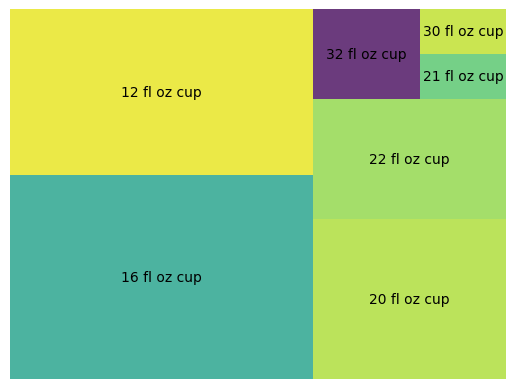

In [28]:
data = dataset.loc[dataset['Category'] == 'Coffee & Tea']
data = data['Serving Size'].value_counts()
squarify.plot(sizes=data.values, label=data.index, alpha=.8 )
plt.axis('off')
plt.show()

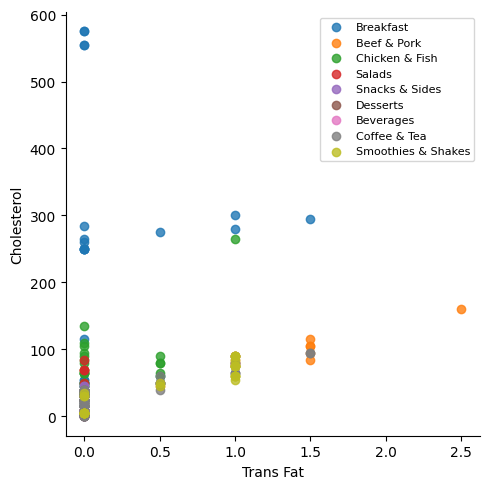

In [29]:
sns.lmplot( x='Trans Fat', y='Cholesterol', data=dataset, fit_reg=False, hue='Category', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right', fontsize=8)

plt.show()


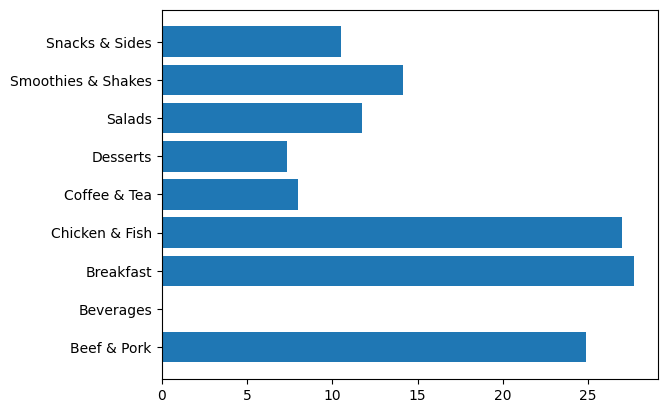

In [30]:
height = dataset.groupby('Category')['Total Fat'].mean()
bars = ('Beef & Pork', 'Beverages', 'Breakfast', 'Chicken & Fish', 'Coffee & Tea', 'Desserts',
        'Salads', 'Smoothies & Shakes', 'Snacks & Sides')

y_pos = np.arange(len(bars))

# Create bars
plt.barh(y_pos, height)

# Create names on the x-axis
plt.yticks(y_pos, bars)

# Show graphic
plt.show()

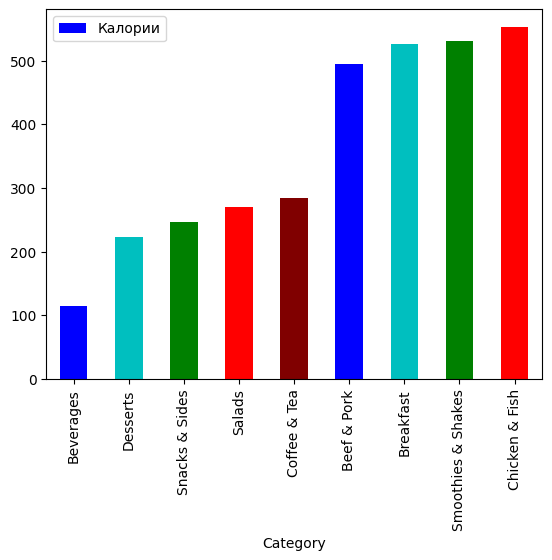

In [31]:
cal = pd.DataFrame(dataset.groupby('Category')['Calories'].mean()).sort_values('Calories')
plot = cal.plot.bar(y='Calories', color=['b','c','g','r','maroon'], label='Калории')

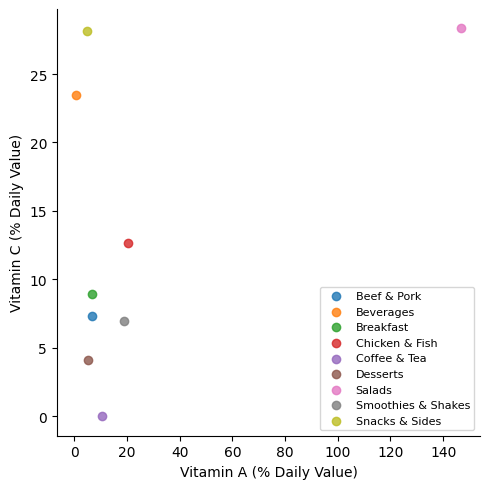

In [32]:
sns.lmplot(x='Vitamin A (% Daily Value)', y='Vitamin C (% Daily Value)', data=vits, fit_reg=False, hue='Category', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right', fontsize=8)

plt.show()


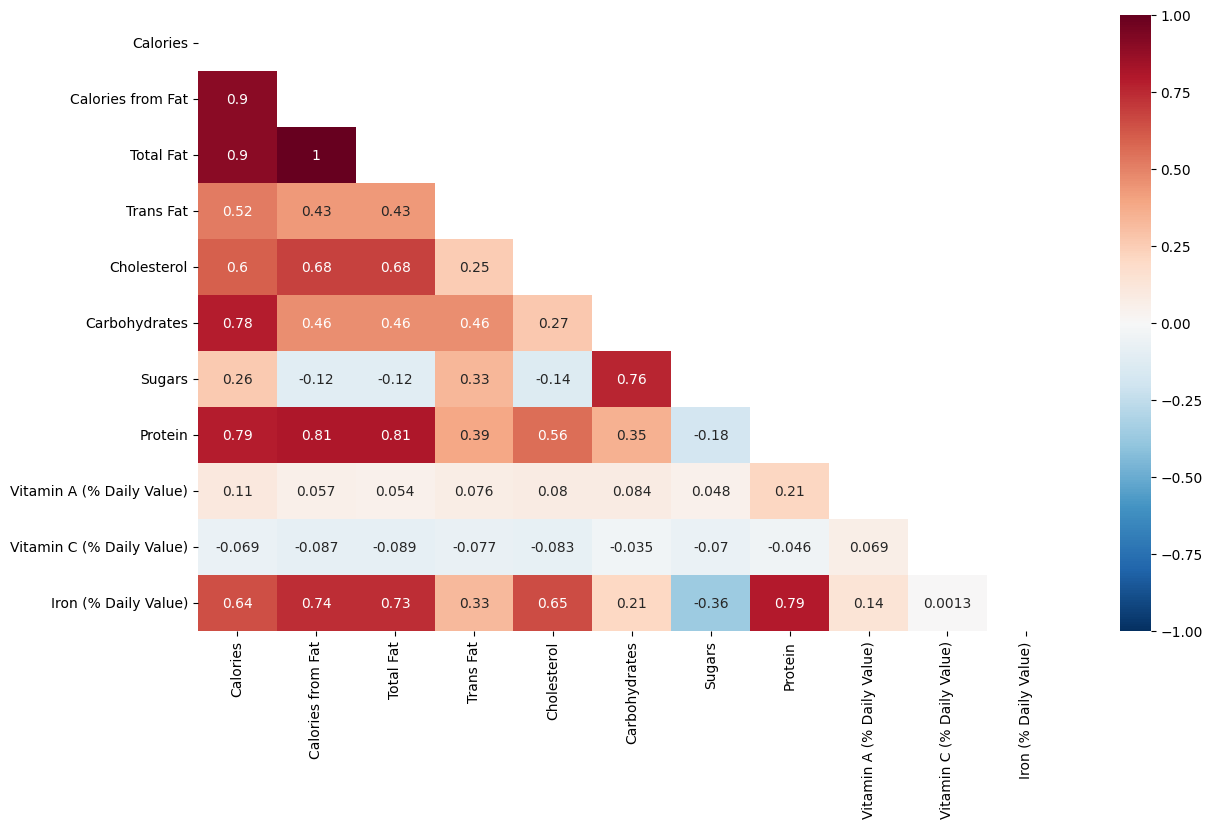

In [33]:
plt.figure(figsize = (14,8))

m =np.triu(np.ones_like(dataset.corr(), dtype=bool))

sns.heatmap(dataset.corr(), mask = m, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r');


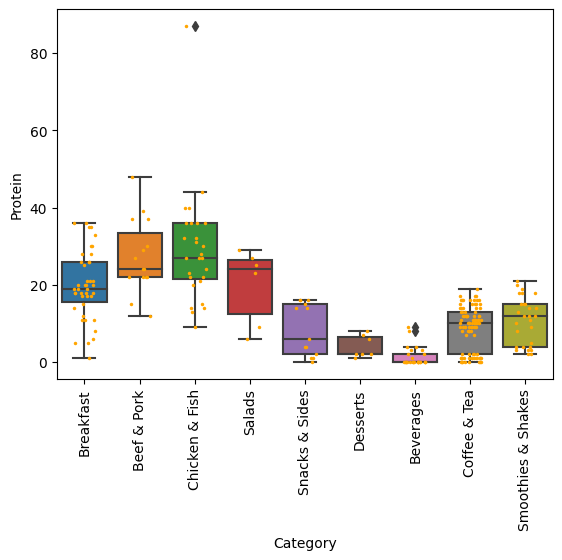

In [34]:
sns.boxplot(x='Category', y='Protein', data=dataset)
ax = sns.stripplot(x='Category', y='Protein', data=dataset, color="orange", jitter=0.2, size=2.5)
plt.xticks(rotation=90)
plt.show()

In [35]:
sorted_df = dataset.sort_values('Protein', ascending=False)
sorted_df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Trans Fat,Cholesterol,Carbohydrates,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Iron (% Daily Value)
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118.0,1.0,265,118,1,87,0,15,25
47,Beef & Pork,Double Quarter Pounder with Cheese,10 oz (283 g),750,380,43.0,2.5,160,42,10,48,10,2,35
81,Chicken & Fish,Chicken McNuggets (20 piece),11.4 oz (323 g),940,530,59.0,0.0,135,59,0,44,0,8,10
60,Chicken & Fish,Premium Grilled Chicken Club Sandwich,8.3 oz (235 g),510,180,20.0,0.0,105,44,9,40,8,20,20
64,Chicken & Fish,Bacon Clubhouse Grilled Chicken Sandwich,9.5 oz (270 g),590,230,25.0,0.0,110,51,14,40,8,30,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Beverages,Coca-Cola Classic (Small),16 fl oz cup,140,0,0.0,0.0,0,39,39,0,0,0,0
136,Beverages,Dasani Water Bottle,16.9 fl oz,0,0,0.0,0.0,0,0,0,0,0,0,0
127,Beverages,Sprite (Medium),21 fl oz cup,200,0,0.0,0.0,0,54,54,0,0,0,0
138,Coffee & Tea,Iced Tea (Medium),21 fl oz cup,0,0,0.0,0.0,0,0,0,0,0,0,0


In [36]:
#sns.pairplot(dataset)
#plt.show()

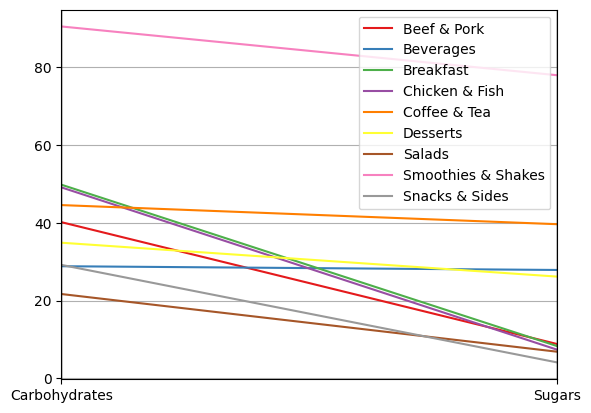

In [37]:
parallel_coordinates(merged, 'Category', colormap=plt.get_cmap("Set1"))
#plt.xticks(rotation=90)
plt.show()


In [38]:
iron=pd.DataFrame(dataset.groupby('Category')['Iron (% Daily Value)'].mean())


In [39]:
d = {'Category': ['Beef & Pork', 'Beverages', 'Breakfast', 'Chicken & Fish', 'Coffee & Tea', 'Desserts', 'Salads',
                  'Smoothies & Shakes', 'Snacks & Sides'], 'Category': ['Beef & Pork', 'Beverages', 'Breakfast',
                                                                        'Chicken & Fish', 'Coffee & Tea', 'Desserts', 'Salads',
                  'Smoothies & Shakes', 'Snacks & Sides']}
df = pd.DataFrame(data=d)

In [40]:
iron = iron.merge(df, left_on='Category', right_on='Category',
          suffixes=('_left', '_right'))

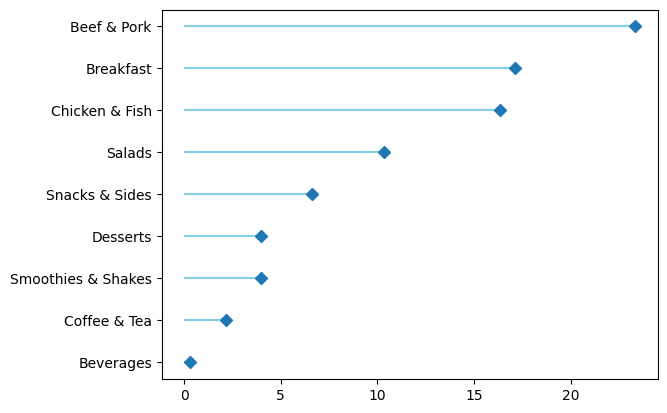

In [41]:
ordered_df = iron.sort_values(by='Iron (% Daily Value)')
my_range=range(1,len(iron.index)+1)
 
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Iron (% Daily Value)'], color='skyblue')
plt.plot(ordered_df['Iron (% Daily Value)'], my_range, "D")
plt.yticks(my_range, ordered_df['Category'])
plt.show()

In [42]:
iron

,Category,Iron (% Daily Value)
0,Beef & Pork,23.333333
1,Beverages,0.296296
2,Breakfast,17.142857
3,Chicken & Fish,16.370370
4,Coffee & Tea,2.147368
5,Desserts,4.000000
6,Salads,10.333333
7,Smoothies & Shakes,3.964286
8,Snacks & Sides,6.615385


In [43]:
dataset.corr()

,Calories,Calories from Fat,Total Fat,Trans Fat,Cholesterol,Carbohydrates,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Iron (% Daily Value)
Calories,1.000000,0.904588,0.904409,0.522441,0.596399,0.781539,0.259598,0.787847,0.108844,-0.068747,0.643552
Calories from Fat,0.904588,1.000000,0.999663,0.433686,0.682161,0.461672,-0.115285,0.807913,0.056731,-0.087331,0.735894
Total Fat,0.904409,0.999663,1.000000,0.431453,0.680547,0.461213,-0.115446,0.807773,0.054434,-0.089354,0.734685
Trans Fat,0.522441,0.433686,0.431453,1.000000,0.253935,0.463250,0.334756,0.388249,0.075833,-0.076612,0.325476
Cholesterol,0.596399,0.682161,0.680547,0.253935,1.000000,0.270977,-0.135518,0.561561,0.080239,-0.082978,0.655000
Carbohydrates,0.781539,0.461672,0.461213,0.463250,0.270977,1.000000,0.762362,0.352122,0.083802,-0.034724,0.210241
Sugars,0.259598,-0.115285,-0.115446,0.334756,-0.135518,0.762362,1.000000,-0.179940,0.048488,-0.069847,-0.364767
Protein,0.787847,0.807913,0.807773,0.388249,0.561561,0.352122,-0.179940,1.000000,0.214098,-0.045777,0.792719
Vitamin A (% Daily Value),0.108844,0.056731,0.054434,0.075833,0.080239,0.083802,0.048488,0.214098,1.000000,0.069171,0.137879
Vitamin C (% Daily Value),-0.068747,-0.087331,-0.089354,-0.076612,-0.082978,-0.034724,-0.069847,-0.045777,0.069171,1.000000,0.001292
